In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import mpl_toolkits
#from mpl_toolkits.basemap import Basemap
from matplotlib import cm
import seaborn as sns
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
from haversine import haversine
from bokeh.io import output_notebook,show
from bokeh.models import HoverTool
from bokeh.plotting import figure
from bokeh.palettes import Spectral4

In [2]:
nt = pd.read_csv("netflix_titles.csv")
nt.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
nt.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
nt.shape

(8807, 12)

In [6]:
nt.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [8]:
nt.duplicated().sum()

0

In [9]:
nt.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
nt["director"].mode()

0    Rajiv Chilaka
Name: director, dtype: object

In [11]:
nt["director"] = nt["director"].fillna("Rajiv Chilaka")

In [12]:
nt["cast"].mode()

0    David Attenborough
Name: cast, dtype: object

In [13]:
nt["cast"] = nt["cast"].fillna("David Attenborough")

In [15]:
nt["country"].mode()

0    United States
Name: country, dtype: object

In [16]:
nt["country"] = nt["country"].fillna("United States")

In [18]:
nt["date_added"].mode()

0    January 1, 2020
Name: date_added, dtype: object

In [19]:
nt["date_added"] = nt["date_added"].fillna("January 1, 2020")

In [21]:
nt["rating"].mode()

0    TV-MA
Name: rating, dtype: object

In [22]:
nt["rating"] = nt["rating"].fillna("TV-MA")

In [25]:
nt["duration"].mode()

0    1 Season
Name: duration, dtype: object

In [26]:
nt["duration"] = nt["duration"].fillna("1 Season")

## VISUALIZATION

C:\Users\miracle\AppData\Local\Temp\ipykernel_9096\849093859.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')


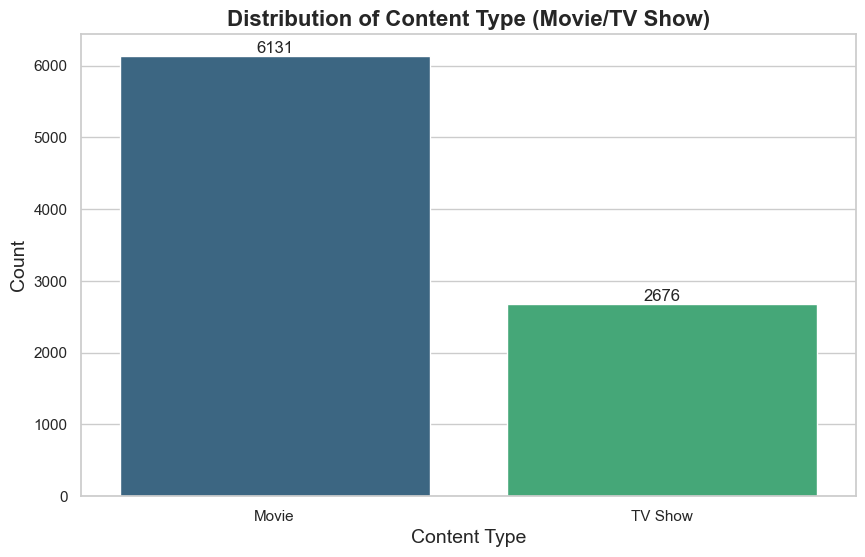

In [39]:
type_counts = nt['type'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')

# Add title and labels
plt.title('Distribution of Content Type (Movie/TV Show)', fontsize=16, fontweight='bold')
plt.xlabel('Content Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add values on top of the bars
for i in range(len(type_counts)):
    plt.text(i, type_counts.values[i], str(type_counts.values[i]), ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()


C:\Users\miracle\AppData\Local\Temp\ipykernel_9096\2270531659.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='coolwarm')


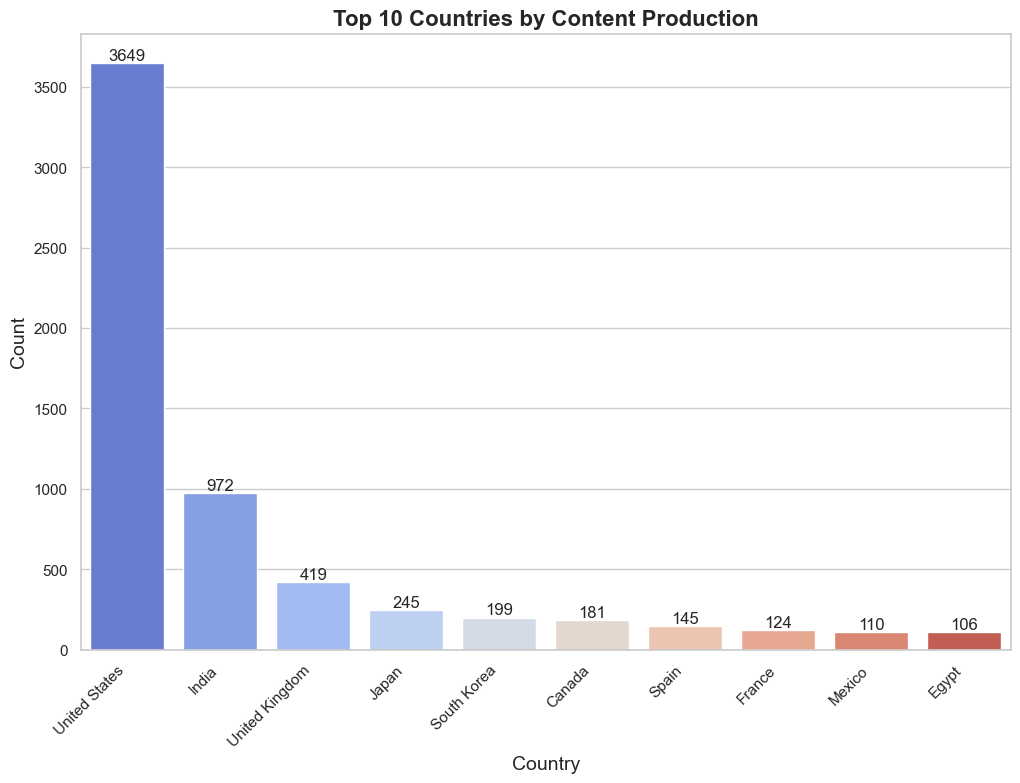

In [40]:
top_countries = nt['country'].value_counts().head(10)
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='coolwarm')

# Add title and labels
plt.title('Top 10 Countries by Content Production', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add values on top of the bars
for i in range(len(top_countries)):
    plt.text(i, top_countries.values[i], str(top_countries.values[i]), ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()


<Axes: title={'center': 'Content Release Over the Years'}, xlabel='release_year'>

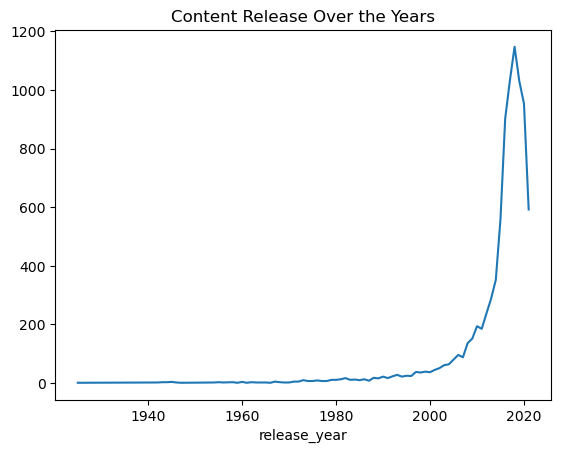

In [33]:
nt['release_year'].value_counts().sort_index().plot(kind='line', title='Content Release Over the Years')


C:\Users\miracle\AppData\Local\Temp\ipykernel_9096\4194692896.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres.values, y=genres.index, palette='viridis')


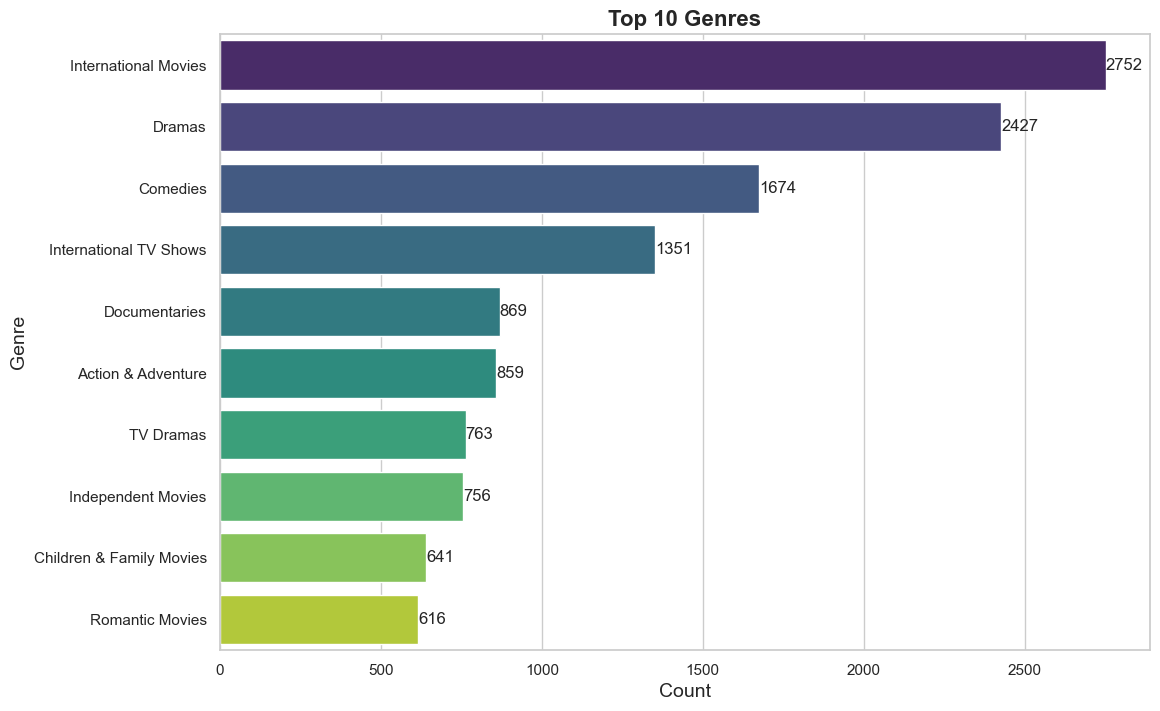

In [43]:
genres = nt['listed_in'].str.get_dummies(sep=', ').sum().sort_values(ascending=False).head(10)
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x=genres.values, y=genres.index, palette='viridis')

# Add title and labels
plt.title('Top 10 Genres', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Genre', fontsize=14)

# Add values on top of the bars
for i in range(len(genres)):
    plt.text(genres.values[i], i, str(genres.values[i]), ha='left', va='center', fontsize=12)

# Show the plot
plt.show()


C:\Users\miracle\AppData\Local\Temp\ipykernel_9096\2330471142.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='muted')


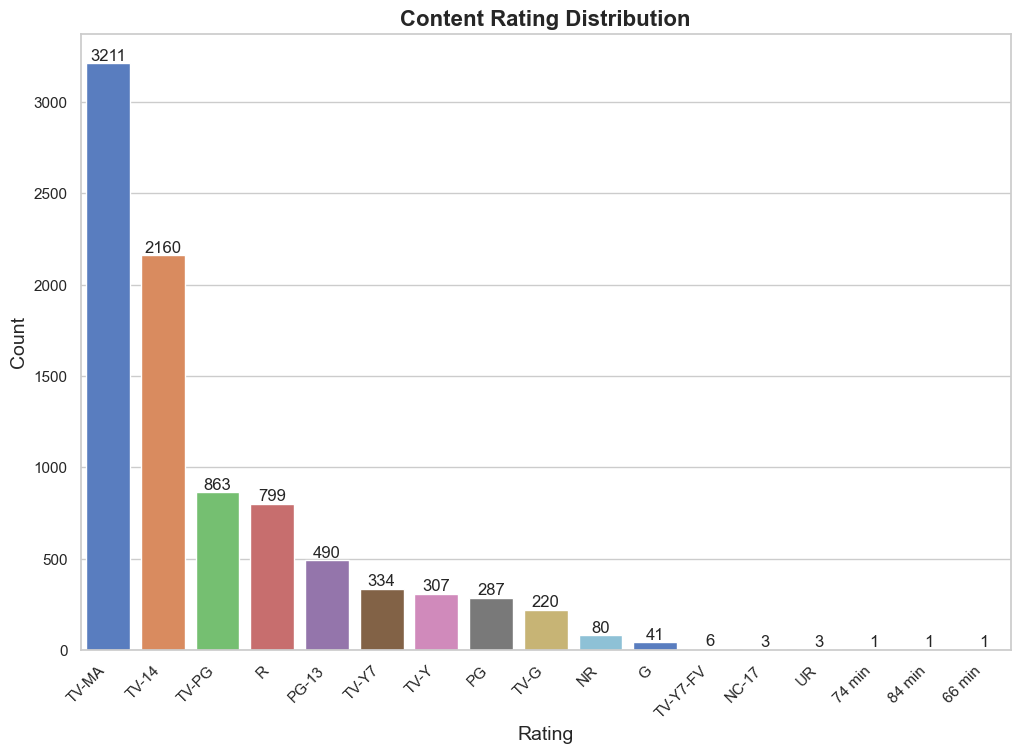

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming nt is your DataFrame and 'rating' is the column you are interested in
rating_counts = nt['rating'].value_counts()

# Set the style of the visualization
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='muted')

# Add title and labels
plt.title('Content Rating Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add values on top of the bars
for i in range(len(rating_counts)):
    plt.text(i, rating_counts.values[i], str(rating_counts.values[i]), ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()


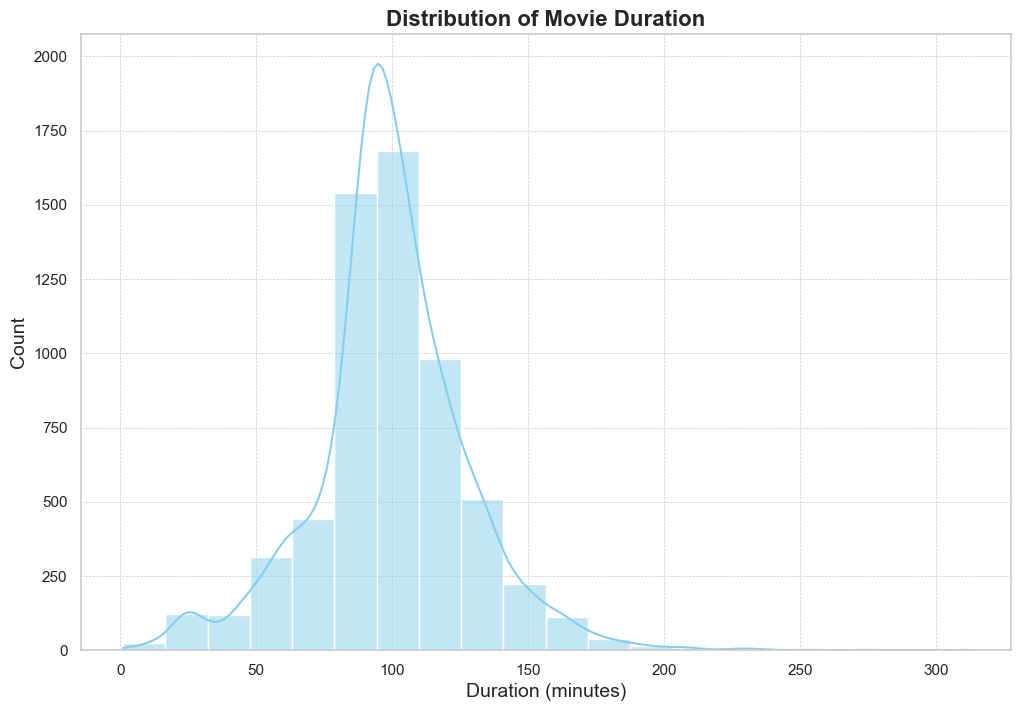

In [46]:
durations = movies['duration']
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 8))
sns.histplot(durations, bins=20, kde=True, color='skyblue')
plt.title('Distribution of Movie Duration', fontsize=16, fontweight='bold')
plt.xlabel('Duration (minutes)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Customize the grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()


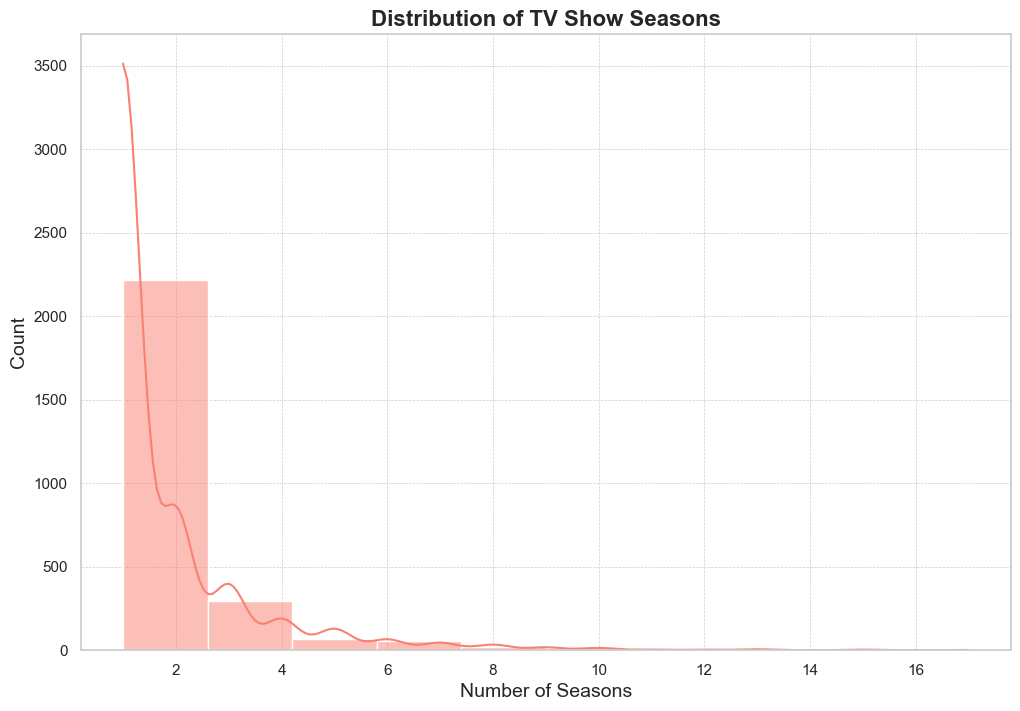

In [47]:
durations = tv_shows['duration']

# Set the style of the visualization
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 8))
sns.histplot(durations, bins=10, kde=True, color='salmon')

# Add title and labels
plt.title('Distribution of TV Show Seasons', fontsize=16, fontweight='bold')
plt.xlabel('Number of Seasons', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Customize the grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()


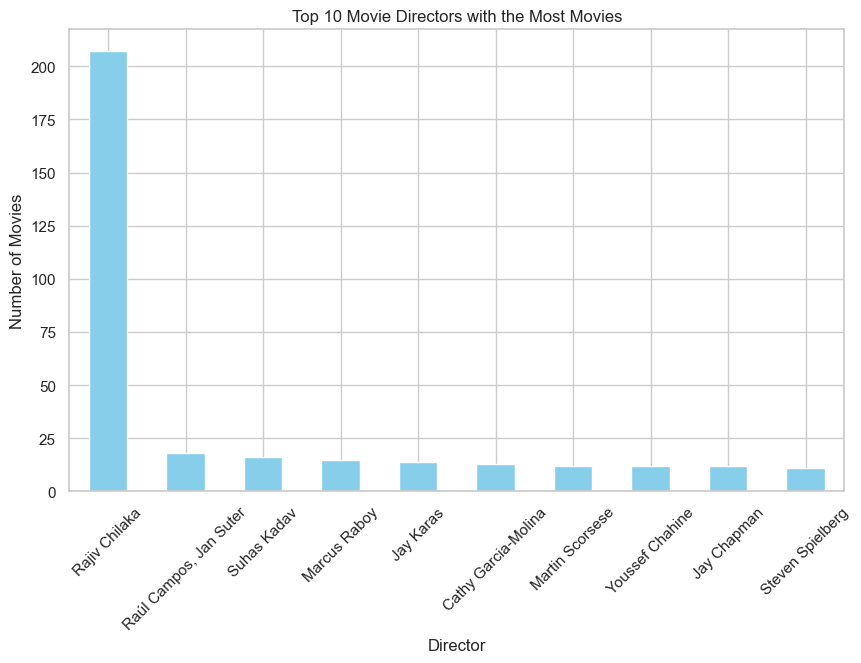

In [63]:
import matplotlib.pyplot as plt

# Plot the top 10 movie directors with the most movies
top_movie_directors.plot(kind='bar', color='skyblue', figsize=(10, 6))

# Add titles and labels
plt.title('Top 10 Movie Directors with the Most Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


In [64]:
# Filter out rows where 'director' or 'rating' is missing
nt_ratings = nt.dropna(subset=['director', 'rating'])

# If ratings are in a categorical format, convert them to numerical values (example mapping)
rating_mapping = {
    'G': 10,
    'PG': 8,
    'PG-13': 7,
    'R': 5,
    'TV-MA': 4,
    # Add other ratings as necessary
}

nt_ratings['rating_numeric'] = nt_ratings['rating'].map(rating_mapping)

# Group by director and calculate the average rating
average_ratings = nt_ratings.groupby('director')['rating_numeric'].mean()

# Sort and get the top directors
top_directors_by_rating = average_ratings.sort_values(ascending=False).head(10)

print("Top Directors with the Highest Average Ratings:")
print(top_directors_by_rating)


Top Directors with the Highest Average Ratings:
director
Brian Smith                    10.0
Mark Dindal                    10.0
Phil Nibbelink, Simon Wells    10.0
Phil Weinstein                 10.0
Henry Hathaway                 10.0
Larry Latham                   10.0
Bernie Denk                    10.0
George Cukor                   10.0
Steve Loter                    10.0
Mark A.Z. Dippé                10.0
Name: rating_numeric, dtype: float64


<Figure size 1400x800 with 0 Axes>

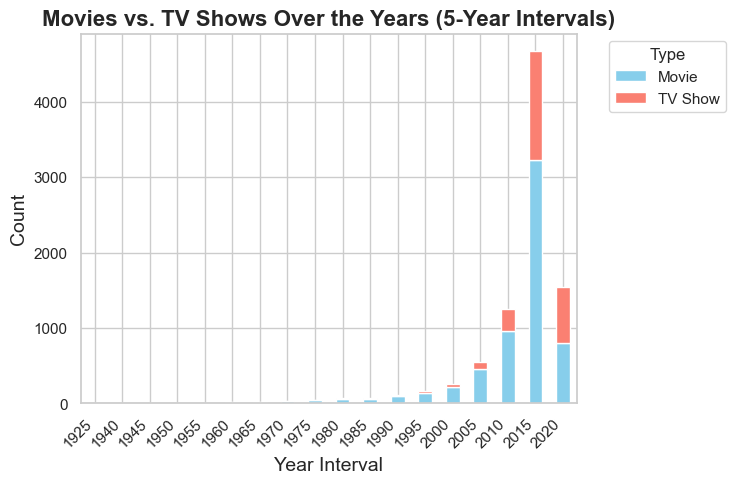

In [52]:

nt['year_interval'] = (nt['release_year'] // 5) * 5

# Group by the new interval column and 'type', then unstack
interval_counts = nt.groupby(['year_interval', 'type']).size().unstack()

# Set the style of the visualization
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(14, 8))
interval_counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], edgecolor='white')

# Add title and labels
plt.title('Movies vs. TV Shows Over the Years (5-Year Intervals)', fontsize=16, fontweight='bold')
plt.xlabel('Year Interval', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


<Figure size 1400x800 with 0 Axes>

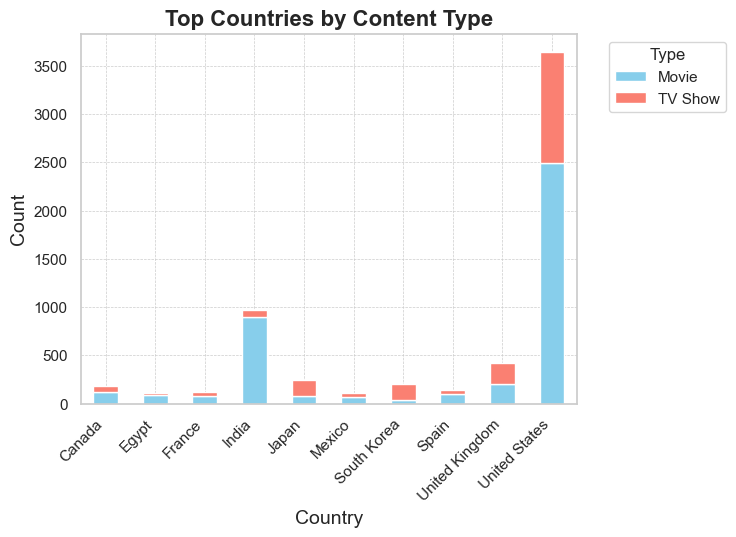

In [54]:
# Get the top 10 countries
top_countries = nt['country'].value_counts().index[:10]

# Filter the DataFrame to include only the top countries
filtered_nt = nt[nt['country'].isin(top_countries)]

# Group by country and type, then unstack
country_type_counts = filtered_nt.groupby(['country', 'type']).size().unstack()

# Set the style of the visualization
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(14, 8))
country_type_counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], edgecolor='white')

# Add title and labels
plt.title('Top Countries by Content Type', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Customize the grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()


<Axes: title={'center': 'Content Rating by Type'}, xlabel='rating'>

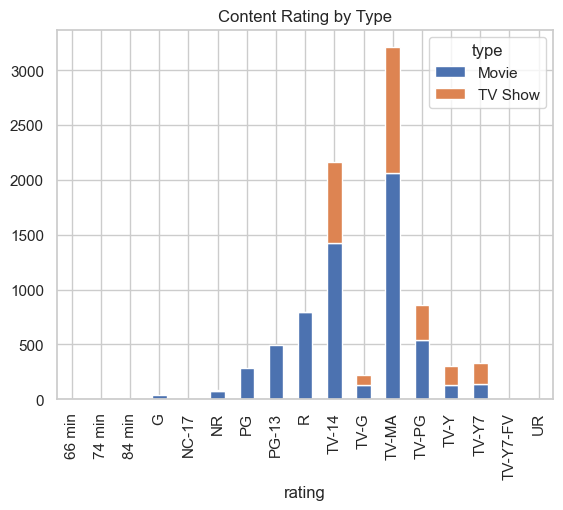

In [55]:
nt.groupby(['rating', 'type']).size().unstack().plot(kind='bar', stacked=True, title='Content Rating by Type')


<Figure size 1400x800 with 0 Axes>

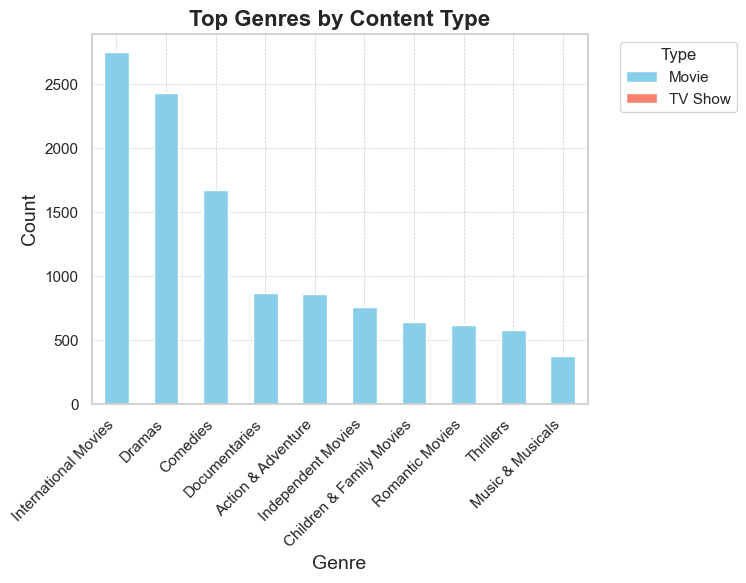

In [58]:
genres_split = nt.assign(genre=nt['listed_in'].str.split(', ')).explode('genre')
genre_type_counts = genres_split.groupby(['genre', 'type']).size().unstack().fillna(0)

# Sort by the count of Movies in descending order and get the top 10 genres
top_genres = genre_type_counts.sort_values(by='Movie', ascending=False).head(10)

# Set the style of the visualization
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(14, 8))
top_genres.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], edgecolor='white')

# Add title and labels
plt.title('Top Genres by Content Type', fontsize=16, fontweight='bold')
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Customize the grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()


<Axes: xlabel='release_year', ylabel='duration'>

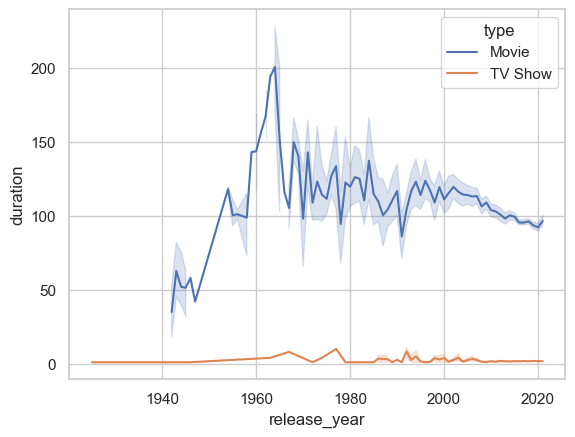

In [59]:
sns.lineplot(data=nt, x='release_year', y='duration', hue='type')


In [60]:
nt.groupby('release_year')['num_reviews'].sum().plot(kind='line', title='Engagement Over the Years')


KeyError: 'Column not found: num_reviews'